## Sensitivities in local volatility surfaces

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aderdouri/EiCNAM/blob/master/Tutorials/Notebooks/sensitivities_in_local_volatility_surfaces.ipynb) [![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/aderdouri/EiCNAM/blob/master/Tutorials/Notebooks/sensitivities_in_local_volatility_surfaces.ipynb)

In [3]:
import numpy as np

# Parameters
eps = 1e-20  # For CVT
r = 0.05
sig = 0.5  # Replace with sig = 0.5 + 1j*eps for CVT-based Vega
T = 1
S0 = 100 + 1j * eps  # Inserting complex part for CVT
K = 110

# Monte Carlo simulation parameters
M = int(1e5)  # Total number of Monte Carlo paths
M2 = int(1e4)  # Number of paths at a time
N = 256
h = T / N

# Estimator variables
sum1 = 0
sum2 = 0
sigbarsum1 = 0
sigbarsum2 = 0
err = 0  # For CVT

# Monte Carlo simulation
for m in range(0, M, M2):
    m2 = min(M2, M - m)
    S = S0 * np.ones(m2, dtype=complex)
    sdot = np.ones(m2, dtype=complex)
    D = np.zeros((N, m2), dtype=complex)
    B = np.zeros((N, m2), dtype=complex)

    # Time evolution
    for n in range(N):
        dW = np.sqrt(h) * np.random.randn(m2)  # Brownian increments
        D[n, :] = 1 + r * h + sig * dW
        B[n, :] = S * dW
        # Forward mode
        sdot *= D[n, :]
        S *= D[n, :]

    # Set sbar(N)
    sbar = np.zeros(m2, dtype=complex)
    for i in range(m2):
        if np.real(S[i]) > K:
            sbar[i] = np.exp(-r * T)
            S[i] = np.exp(-r * T) * S[i]
        else:
            sbar[i] = 0
            S[i] = 0

    # Adjoint recursion
    sigbar = np.zeros(m2, dtype=complex)
    for n in range(N - 1, -1, -1):
        sigbar += sbar * B[n, :]
        sbar = D[n, :] * sbar

    # Check error in dS_N/dS_0
    sbar = np.real(sbar)
    sdot = np.real(sdot)
    err = max(
        err,
        np.max(np.abs(sbar - np.imag(S) / eps)),
        np.max(np.abs(sdot - np.imag(S) / eps)),
    )

    # Use adjoint mode results
    sum1 += np.sum(sbar)
    sum2 += np.sum(sbar**2)
    sigbarsum1 += np.sum(sigbar)
    sigbarsum2 += np.sum(sigbar**2)

# Compute Delta and Vega
delta_approx = sum1 / M  # Delta estimator
sig2 = (sum2 / M - (sum1 / M) ** 2)  # Variance
print(f"Numerical Delta: {delta_approx:.6f} +/- {3 * np.sqrt(sig2 / M):.6f}")

vega_approx = sigbarsum1 / M  # Vega estimator
sig3 = (sigbarsum2 / M - (sigbarsum1 / M) ** 2)  # Variance
print(f"Numerical Vega: {vega_approx:.6f} +/- {3 * np.sqrt(sig3 / M):.6f}")
print(f"Error in dS_N/dS_0 vs CVT result: {err:.6e}")

Numerical Delta: 0.569575 +/- 0.007604
Numerical Vega: 39.961228+0.000000j +/- 1.023385+0.000000j
Error in dS_N/dS_0 vs CVT result: 1.099985e+00


In [2]:
import numpy as np

# Parameters
eps = 1e-20  # For CVT
r = 0.05
sig = 0.5  # Replace with sig = 0.5 + 1j*eps for CVT-based Vega
T = 1
S0 = 100 + 1j * eps  # Inserting complex part for CVT
K = 110

# Monte Carlo simulation parameters
M = int(1e5)  # Total number of Monte Carlo paths
M2 = int(1e4)  # Number of paths at a time
N = 256
h = T / N

# Estimator variables
sum1 = 0
sum2 = 0
sigbarsum1 = 0
sigbarsum2 = 0
err = 0  # For CVT

# Monte Carlo simulation
for m in range(0, M, M2):
    m2 = min(M2, M - m)
    S = S0 * np.ones(m2, dtype=complex)
    sdot = np.ones(m2, dtype=complex)
    D = np.zeros((N, m2), dtype=complex)
    B = np.zeros((N, m2), dtype=complex)

    # Time evolution
    for n in range(N):
        dW = np.sqrt(h) * np.random.randn(m2)  # Brownian increments
        D[n, :] = 1 + r * h + sig * dW
        B[n, :] = S * dW
        # Forward mode
        sdot *= D[n, :]
        S *= D[n, :]

    # Set sbar(N)
    sbar = np.zeros(m2, dtype=complex)
    for i in range(m2):
        if np.real(S[i]) > K:
            sbar[i] = np.exp(-r * T)
            S[i] = np.exp(-r * T) * S[i]
        else:
            sbar[i] = 0
            S[i] = 0

    # Adjoint recursion
    sigbar = np.zeros(m2, dtype=complex)
    for n in range(N - 1, -1, -1):
        sigbar += sbar * B[n, :]
        sbar = D[n, :] * sbar

    # Check error in dS_N/dS_0
    sbar = np.real(sbar)
    sdot = np.real(sdot)
    err = max(
        err,
        np.max(np.abs(sbar - np.imag(S) / eps)),
        np.max(np.abs(sdot - np.imag(S) / eps)),
    )

    # Use adjoint mode results
    sum1 += np.sum(sbar)
    sum2 += np.sum(sbar**2)
    sigbarsum1 += np.sum(sigbar)
    sigbarsum2 += np.sum(sigbar**2)

# Compute Delta and Vega
delta_approx = sum1 / M  # Delta estimator
sig2 = (sum2 / M - (sum1 / M) ** 2)  # Variance
print(f"Numerical Delta: {delta_approx:.6f} +/- {3 * np.sqrt(sig2 / M):.6f}")

vega_approx = sigbarsum1 / M  # Vega estimator
sig3 = (sigbarsum2 / M - (sigbarsum1 / M) ** 2)  # Variance
print(f"Numerical Vega: {vega_approx:.6f} +/- {3 * np.sqrt(sig3 / M):.6f}")

print(f"Error in dS_N/dS_0 vs CVT result: {err:.6e}")


Numerical Delta: 0.564752 +/- 0.007571
Numerical Vega: 39.407817+0.000000j +/- 1.007661+0.000000j
Error in dS_N/dS_0 vs CVT result: 1.099992e+00


In [10]:
import numpy as np

def forward_mode(iT, jT):
    """
    Calculates sensitivities of a local volatility surface of a European call option
    using the forward technique.
    """
    # Problem parameters
    r = 0.05
    sig0 = 0.5
    T = 1
    S0 = 100
    K = 110

    # Local volatility grid parameters
    J = 20
    I = 20  # I < N

    # Monte Carlo simulation parameters
    M = int(1e4)  # Total number of Monte Carlo paths
    M2 = int(1e3)  # Number of paths at a time
    N = 100
    h = T / N

    # Local volatility surface grid setup
    Smin = 0.8 * S0
    Smax = 1.2 * S0
    dS = (Smax - Smin) / J
    dT = T / I

    LocalVolSurf = np.ones((I + 1, J + 1)) * sig0
    for i in range(1, I + 2):  # Loop from 1 to I+1 (MATLAB-style indexing)
        LocalVolSurf[i - 1, :] *= ((I + 1) * ((i ** -1 + i ** -0.5) / 2)) / (I + 1)

    # Set up derivative operator matrix
    dLocalVolSurf = np.zeros((I + 1, J + 1))
    dLocalVolSurf[iT - 1, jT - 1] = 1  # Adjust for MATLAB-style 1-based indexing

    # Interpolation over time
    iIndex = np.floor(np.arange(1, N + 1) * h / dT).astype(int)
    beta = ((np.arange(1, N + 1) * h - iIndex * dT) / dT)
    iIndex = np.insert(iIndex, 0, 0)
    beta = np.insert(beta, 0, 0)

    sigJ = np.zeros((N + 1, J + 1))
    dSigJ = np.zeros((N + 1, J + 1))

    for n in range(N + 1):
        sigJ[n, :] = (
            LocalVolSurf[np.clip(1 + iIndex[n], 0, I), :]  # Ensure index is within bounds
            + beta[n]
            * (
                LocalVolSurf[np.clip(1 + iIndex[n] + 1, 0, I), :]  # Ensure index is within bounds
                - LocalVolSurf[np.clip(1 + iIndex[n], 0, I), :]
            )
        )
        dSigJ[n, :] = (
            dLocalVolSurf[np.clip(1 + iIndex[n], 0, I), :]  # Ensure index is within bounds
            + beta[n]
            * (
                dLocalVolSurf[np.clip(1 + iIndex[n] + 1, 0, I), :]  # Ensure index is within bounds
                - dLocalVolSurf[np.clip(1 + iIndex[n], 0, I), :]
            )
        )

    # Estimator variables
    Pdot = 0
    PdotVar = 0

    # Monte Carlo simulation
    for m in range(0, M, M2):
        m2 = min(M2, M - m)
        S = np.full(m2, S0, dtype=np.float64)  # Initialize S with float64 to match D
        D = np.zeros((N, m2), dtype=np.float64)
        B = np.zeros((N, m2), dtype=np.float64)
        alpha = np.zeros((N + 1, m2), dtype=np.float64)
        jIndex = np.zeros((N + 1, m2), dtype=int)
        A = np.zeros((N + 1, m2), dtype=np.float64)
        Sdot = np.zeros(m2, dtype=np.float64)

        for n in range(N):
            dW = np.sqrt(h) * np.random.randn(m2)

            # Stock price interpolation
            jIndex[n, :] = np.clip(
                np.floor((S - Smin) / dS).astype(int), 0, J
            )
            alpha[n, :] = (S - (Smin + jIndex[n, :] * dS)) / dS

            sig = sigJ[n, jIndex[n, :]] + alpha[n, :] * (
                sigJ[n, np.clip(jIndex[n, :] + 1, 0, J)] - sigJ[n, jIndex[n, :]]
            )

            D[n, :] = 1 + r * h + sig * dW

            # Linear interpolation of dSigJ
            dSig = dSigJ[n, jIndex[n, :]] + alpha[n, :] * (
                dSigJ[n, np.clip(jIndex[n, :] + 1, 0, J)] - dSigJ[n, jIndex[n, :]]
            ) + (1 / dS) * (
                sigJ[n, np.clip(jIndex[n, :] + 1, 0, J)] - sigJ[n, jIndex[n, :]]
            ) * S

            # Forward mode iteration
            B[n, :] = S * dW
            Sdot = D[n, :] * Sdot + B[n, :] * dSig

            # Timestep
            S *= D[n, :]  # No type mismatch now

        for i in range(m2):
            if S[i] > K:
                Sdot[i] = np.exp(-r * T) * S[i]
            else:
                Sdot[i] = 0

        Pdot += np.sum(Sdot)
        PdotVar += np.sum(Sdot**2)

    Pdot /= M
    PdotVar = (
        3 * np.sqrt((M / (M - 1)) * (PdotVar / M - Pdot**2)) / np.sqrt(M)
    )
    return Pdot, PdotVar


# Example usage
Pdot, PdotVar = forward_mode(iT=5, jT=10)
print(f"Pdot: {Pdot}")
print(f"Pdot Variance: {PdotVar}")

Pdot: 39.206501997193634
Pdot Variance: 1.6291538797010425


In [11]:
import numpy as np

def adjoint_mode():
    """
    Calculates sensitivities of a local volatility surface of a European call option
    using the adjoint technique.
    """
    # Problem parameters
    r = 0.05
    sig0 = 0.5
    T = 1
    S0 = 100
    K = 110

    # Local volatility grid parameters
    J = 20
    I = 20  # I < N

    # Monte Carlo simulation parameters
    M = int(1e6)  # Total number of Monte Carlo paths
    M2 = int(1e4)  # Number of paths at a time
    N = 100
    h = T / N

    # Local volatility surface grid setup
    Smin = 0.8 * S0
    Smax = 1.2 * S0
    dS = (Smax - Smin) / J
    dT = T / I

    # Initialize local volatility surface
    LocalVolSurf = np.ones((I + 1, J + 1)) * sig0
    for i in range(1, I + 2):  # Loop from 1 to I+1 (MATLAB-style indexing)
        LocalVolSurf[i - 1, :] *= ((I + 1) * ((i ** -1 + i ** -0.5) / 2)) / (I + 1)

    # Initialize sensitivities
    LocalSens = np.zeros((I + 1, J + 1))
    LocalSensConf = np.zeros((I + 1, J + 1))

    # Time interpolation
    iIndex = np.floor(np.arange(1, N + 1) * h / dT).astype(int)
    beta = ((np.arange(1, N + 1) * h - iIndex * dT) / dT)
    iIndex = np.insert(iIndex, 0, 0)
    beta = np.insert(beta, 0, 0)

    # Setup interpolation over time
    sigJ = np.zeros((N + 1, J + 1))
    for n in range(N + 1):
        sigJ[n, :] = (
            LocalVolSurf[1 + iIndex[n] - 1, :]  # Adjust for Python indexing
            + beta[n]
            * (
                LocalVolSurf[min(1 + iIndex[n], I) - 1, :]  # Adjust for Python indexing
                - LocalVolSurf[1 + iIndex[n] - 1, :]
            )
        )

    # Main Monte Carlo sampling loop
    for m in range(0, M, M2):
        m2 = min(M2, M - m)
        S = np.full(m2, S0, dtype=np.float64)
        D = np.zeros((N, m2), dtype=np.float64)
        B = np.zeros((N, m2), dtype=np.float64)
        alpha = np.zeros((N + 1, m2), dtype=np.float64)
        jIndex = np.zeros((N + 1, m2), dtype=int)
        A = np.zeros((N + 1, m2), dtype=np.float64)

        # Forward iteration
        for n in range(N):
            dW = np.sqrt(h) * np.random.randn(m2)
            jIndex[n, :] = np.clip(np.floor((S - Smin) / dS).astype(int), 0, J)
            alpha[n, :] = (S - (Smin + jIndex[n, :] * dS)) / dS
            sig = sigJ[n, jIndex[n, :]] + alpha[n, :] * (
                sigJ[n, np.clip(jIndex[n, :] + 1, 0, J)] - sigJ[n, jIndex[n, :]]
            )
            D[n, :] = 1 + r * h + sig * dW
            A[n, :] = (1 / dS) * (
                sigJ[n, np.clip(jIndex[n, :] + 1, 0, J)] - sigJ[n, jIndex[n, :]]
            )
            B[n, :] = S * dW
            S *= D[n, :]

        jIndex[N, :] = np.clip(np.floor((S - Smin) / dS).astype(int), 0, J)
        alpha[N, :] = (S - (Smin + jIndex[N, :] * dS)) / dS

        # -------------------------- ADJOINT METHOD ----------------------------- #
        Sbar = np.zeros(m2, dtype=np.float64)
        for i in range(m2):
            if S[i] > K:
                Sbar[i] = np.exp(-r * T)

        sigbarJ = np.zeros((N + 1, J + 1, m2), dtype=np.float64)
        sigbarIJ = np.zeros((I + 1, J + 1, m2), dtype=np.float64)

        for n in range(N - 1, -1, -1):
            sigbar = Sbar * B[n, :]
            Sbar = (D[n, :] + B[n, :] * A[n, :]) * Sbar

            for k in range(m2):
                j = jIndex[n, k]
                if j < J:
                    sigbarJ[n, j, k] = (1 - alpha[n, k]) * sigbar[k]
                    sigbarJ[n, j + 1, k] = alpha[n, k] * sigbar[k]
                else:
                    sigbarJ[n, j, k] = sigbar[k]

            for k in range(m2):
                i = iIndex[n]
                j = jIndex[n, k]
                sigbarIJ[i, j, k] += (1 - beta[n]) * sigbarJ[n, j, k]
                if j < J:
                    sigbarIJ[i, j + 1, k] += (1 - beta[n]) * sigbarJ[n, j + 1, k]
                    if i < I:
                        sigbarIJ[i + 1, j + 1, k] += beta[n] * sigbarJ[n, j + 1, k]
                if i < I:
                    sigbarIJ[i + 1, j, k] += beta[n] * sigbarJ[n, j, k]

        LocalSens += np.sum(sigbarIJ, axis=2)
        LocalSensConf += np.sum(sigbarIJ**2, axis=2)

    LocalSens /= M
    LocalSensConf = np.sqrt((M / (M - 1)) * (LocalSensConf / M - LocalSens**2)) * 3 / np.sqrt(M)

    return LocalSens, LocalSensConf


# Example usage
LocalSens, LocalSensConf = adjoint_mode()
print("LocalSens:")
print(LocalSens)
print("LocalSensConf:")
print(LocalSensConf)

LocalSens:
[[ 2.42388120e-03  2.12029209e-03  6.88932737e-03  1.47196078e-02
   3.05068339e-02  5.53118228e-02  9.54734714e-02  1.48166075e-01
   2.11424693e-01  2.70644781e-01  1.42670209e+00  2.88800370e-01
   2.52126131e-01  1.99125013e-01  1.41315513e-01  9.27250674e-02
   5.79864390e-02  3.78999470e-02  2.19861269e-02  1.28407144e-02
   1.66725199e-02]
 [ 1.65228806e-02  7.46386748e-03  2.77242413e-02  5.08850011e-02
   8.81517288e-02  1.37142666e-01  1.98532287e-01  2.63901305e-01
   3.35555552e-01  3.96990400e-01  4.26353650e-01  4.32226611e-01
   4.08203553e-01  3.65096037e-01  3.06078870e-01  2.43705467e-01
   1.84095002e-01  1.39587576e-01  9.90640453e-02  6.45531355e-02
   1.24275313e-01]
 [ 1.25581188e-02  5.04129178e-03  1.84531947e-02  3.40427257e-02
   5.48317895e-02  8.45681085e-02  1.21215257e-01  1.60514880e-01
   1.98319308e-01  2.27223329e-01  2.52701211e-01  2.66835997e-01
   2.58599261e-01  2.44988154e-01  2.20258776e-01  1.86518123e-01
   1.53944941e-01  1.162245

In [12]:
LocalSensConf.shape

(21, 21)

In [13]:
LocalSens.shape

(21, 21)

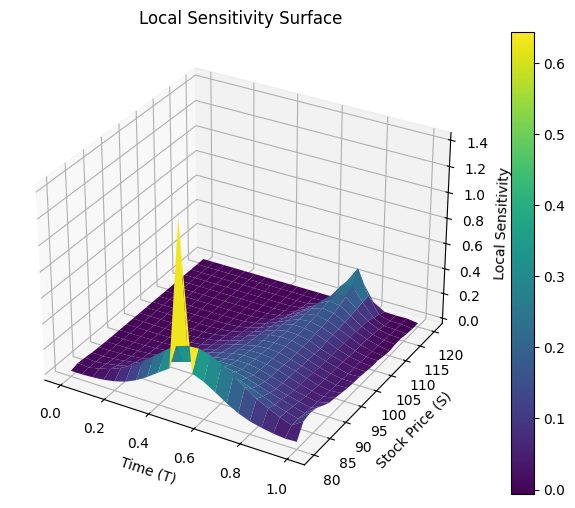

In [14]:
# prompt: plot LocalSens surface

import matplotlib.pyplot as plt
import numpy as np

# Assuming LocalSens and LocalSensConf are already calculated from the adjoint_mode function

# Example usage (replace with your actual LocalSens and LocalSensConf)
# LocalSens, LocalSensConf = adjoint_mode()


# Local volatility grid parameters
J = 20
I = 20  # I < N

# Local volatility surface grid setup
S0 = 100
Smin = 0.8 * S0
Smax = 1.2 * S0
dS = (Smax - Smin) / J
dT = 1 / I  # Assuming T = 1

# Create the grid for plotting
S_grid = np.linspace(Smin, Smax, J + 1)
T_grid = np.linspace(0, 1, I + 1)
T_grid, S_grid = np.meshgrid(T_grid, S_grid)

# Plot the LocalSens surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_grid, S_grid, LocalSens, cmap='viridis')

# Add labels and title
ax.set_xlabel("Time (T)")
ax.set_ylabel("Stock Price (S)")
ax.set_zlabel("Local Sensitivity")
ax.set_title("Local Sensitivity Surface")

# Add a colorbar
fig.colorbar(surf)

# Show the plot
plt.show()

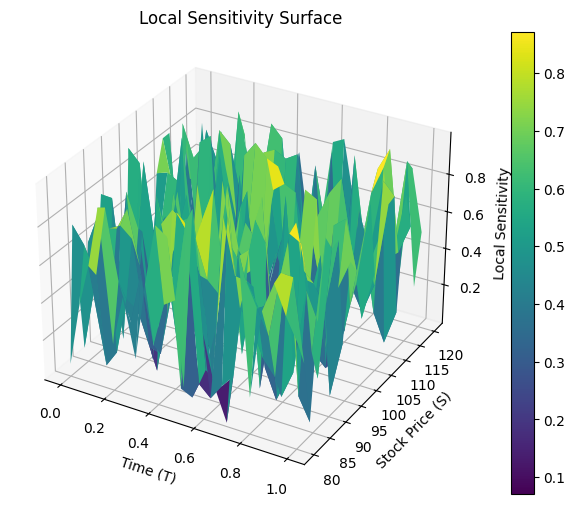

In [15]:
# prompt: plot LocalSensConf surface

import matplotlib.pyplot as plt
import numpy as np

# Assuming LocalSens and LocalSensConf are already calculated from the adjoint_mode function
# Replace with your actual LocalSens and LocalSensConf
# LocalSens, LocalSensConf = adjoint_mode()

# Example data (replace with your actual LocalSens)
I = 20
J = 20
LocalSens = np.random.rand(I + 1, J + 1)

# Local volatility grid parameters
S0 = 100
Smin = 0.8 * S0
Smax = 1.2 * S0
dS = (Smax - Smin) / J
dT = 1 / I  # Assuming T = 1

# Create the grid for plotting
S_grid = np.linspace(Smin, Smax, J + 1)
T_grid = np.linspace(0, 1, I + 1)
T_grid, S_grid = np.meshgrid(T_grid, S_grid)

# Plot the LocalSens surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_grid, S_grid, LocalSens, cmap='viridis')

# Add labels and title
ax.set_xlabel("Time (T)")
ax.set_ylabel("Stock Price (S)")
ax.set_zlabel("Local Sensitivity")
ax.set_title("Local Sensitivity Surface")

# Add a colorbar
fig.colorbar(surf)

# Show the plot
plt.show()